Characters:
person: name, persona, location

Locations:
location: name, connection, description

Items:
item: name, description, location

Input Story Source:

 - Harry Potter original copy（https://raw.githubusercontent.com/khushmeeet/potter-nlp/master/final_data/book1.txt ）

- Harry Potter Story Abstract ( https://en.wikipedia.org/wiki/Harry_Potter_and_the_Philosopher%27s_Stone )



---

From **Generating Interactive Worlds with Text**:
(
https://arxiv.org/pdf/1911.09194.pdf )



How do we use our proposed models collectively to make
a new game world? 
- First, an empty map grid is initialized
to represent the number of possible locations. A percentage of grid positions are marked inaccessible to make exploration more interesting. The central location is populated
randomly. We use the best performing model to iteratively
fill in neighboring locations until the entire grid is populated. 
- Then, for each placed location, the model is used to
predict which characters and objects should populate that location. 
- Finally, the model is used to predict if objects should
be placed inside existing objects. Figure 1 displays an example generated world, with model predictions shown for
missing elements. 

In an interactive setting where players are able to design
their own worlds, we use models to provide suggestions for
which elements to place. If players enter names of game elements not present in the dataset, our generative models are
used to write descriptions, personas, and affordances.



---

From **Bringing Stories Alive: Generating Interactive Fiction Worlds**: ( https://arxiv.org/pdf/2001.10161.pdf )

- The first step is to extract the set of entities—graph
vertices—from the story. We are looking to extract information specifically regarding characters, locations, and objects.
This is done by using asking the QA model questions such as
“Who is a character in the story?”. Ribeiro et al. [2019] have
shown that the phrasing of questions given to a QA model is
important and this forms the basis of how we formulate our
questions—questions are asked so that they are more likely
to return a single answer, e.g. asking “Where is a location
in the story?” as opposed to “Where are the locations in the
story?”. In particular, we notice that pronoun choice can be
crucial; “Where is a location in the story?” yielded more consistent extraction than “What is a location in the story?”. ALBERT QA is trained to also output a special <no-answer>
token when it cannot find an answer to the question within
the story. Our method makes use of this by iteratively asking
QA model a question and masking out the most likely answer
outputted on the previous step. This process continues until
the <no-answer> token becomes the most likely answer.

- The next step is graph construction. Typical interactive fiction worlds are usually structured as trees, i.e. no cycles except between locations. Using this fact, we use an approach
that builds a graph from the vertex set by one relation—or
edge—at a time. Once again using the entire story plot as
context, we query the ALBERT-QA model picking a random starting location x from the set of vertices previously
extracted.and asking the questions “What location can I visit
from x?” and “Who/What is in x?”. The methodology for
phrasing these questions follows that described for the vertex
extraction. The answer given by the QA model is matched to
the vertex set by picking the vertex u that contains the best
word-token overlap with the answer. Relations between vertices are added by computing a relation probability on the
basis of the output probabilities of the answer given by the
QA model. The probability that vertices x, u are related:
P(x, u) = p(x, u) + p(u, x)
2
(1)
where
p(x, u) = X
o∈QA outputs
p(o)1{u = argmax
v
(v ∩ o)} (2)
is the sum of the individual token probabilities of all the overlapping tokens in the answer from the QA model and u.

### Installation

In [ ]:
!pip install stanza

     |████████████████████████████████| 432 kB 9.4 MB/s 
     |████████████████████████████████| 175 kB 44.9 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=f765e0e37967df701af143f950b5b17a7721f27441792dded19609008399b95a
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
!pip install graphviz

In [ ]:
!pip install openai

     |████████████████████████████████| 42 kB 831 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 162 kB 12.5 MB/s 
  Created wheel for openai: filename=openai-0.18.1-py3-none-any.whl size=53168 sha256=3fce817baef160240bed50c05adb4d7f5b0b41a26256c88fae13403b3f6057bd
  Stored in directory: /root/.cache/pip/wheels/5a/bf/24/fcdc9d2b81f9c7e565bb2036ec9f7cc930056b829895b3bf48
Successfully built openai


In [ ]:
# story = "Vox Machina have just entered the dwarven city of Kraghammer for the first time on their quest to find Lady Kima of Vord. They know that she was headed for the mithral mine owned by Nostoc Greyspine, but they decide to find somewhere to sleep first. The party notices a group of armored dwarves awkwardly watching them. Tiberius—the only one besides Pike who can speak Dwarvish—asks them where they can find suitable lodgings. One of the dwarves, Jepsen, tells them in Common to go to 'The Pig Pits'. Vex'ahlia guesses that the Pig Pits are actual pits for pigs. Thompson weakly denies this. Scanlan asks for directions to the Pig Pits and the dwarf points to a distant slop of mud where livestock are kept. Vex'ahlia gives a piece of gold to Thompson to show them to actual lodgings."

In [ ]:
#open text file in read mode
text_file = open("/content/HP1_summary.txt", "r")
 
#read whole file to a string
hp_story = text_file.read()
 
#close file
text_file.close()
 
hp_story = hp_story.replace("\xa0", " ")
print(hp_story)

Harry Potter lives with his abusive aunt and uncle, Vernon and Petunia Dursley and their bullying son, Dudley. On Harry's eleventh birthday, a half-giant named Rubeus Hagrid personally delivers an acceptance letter to Hogwarts School of Witchcraft and Wizardry, revealing that Harry's parents, James and Lily Potter, were wizards. When Harry was one year old, an evil and powerful dark wizard, Lord Voldemort, murdered his parents. Harry survived Voldemort's killing curse that rebounded off his forehead and seemingly destroyed the Dark Lord, leaving a lightning bolt-shaped scar on his forehead. Unknown to Harry, he is famous in the wizarding world.
Hagrid takes Harry to Diagon Alley, the hidden wizard commerce and retail section in London. Harry's parents have left him a fortune kept in Gringotts Wizarding Bank. Harry buys school supplies and a wand from Ollivander. The cores of Harry and Lord Voldemort's wands have feathers from the same phoenix bird, making them "brothers". Hagrid gives 

###Extract Characters and Locations with stanza

In [ ]:
import stanza
stanza.download('en')   # This downloads the English models for the neural pipeline
stanza_nlp = stanza.Pipeline(lang='en', processors='tokenize,ner') # This sets up a default neural pipeline in English

2022-04-19 17:39:32 INFO: Downloading default packages for language: en (English)...


2022-04-19 17:39:48 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-04-19 17:39:48 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2022-04-19 17:39:48 INFO: Use device: cpu
2022-04-19 17:39:48 INFO: Loading: tokenize
2022-04-19 17:39:48 INFO: Loading: ner
2022-04-19 17:39:49 INFO: Done loading processors!


In [ ]:
doc = stanza_nlp(hp_story)
doc.sentences[0].print_dependencies()

In [ ]:
people = set()
locations = set()
# organization = set()
other_entities = set()
other_tags = set()
all_entities = set()

people_split = set()
for ent in doc.ents:
  all_entities.add(ent.text)
  if ent.type == "PERSON":
    if ent.text not in people_split:
      people.add(ent.text)
      people_split.update(ent.text.split())
  elif ent.type == "ORG" or ent.type == "FAC":
    locations.add(ent.text)
  elif ent.type != "DATE" and ent.type != "CARDINAL":
    other_entities.add((ent.text, ent.type))
  else:
    other_tags.add(ent)

print("People:\n",people)
print("Location:\n", locations)
# print("Other Entities:\n", other_entities)
# print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in other_tags], sep='\n')

People:
 {'Nicolas Flamel', 'Albus Dumbledore', 'Firenze', 'Quirrell', 'Diagon Alley', 'Hedwig', 'Voldemort', 'Harry Potter', "Lord Voldemort's", 'Petunia Dursley', 'Dudley', 'Draco Malfoy', 'Slytherin', 'Severus Snape', 'Ravenclaw', 'Vernon', 'Lily Potter', 'Gryffindor', 'Hermione Granger', 'Rubeus Hagrid', 'James', 'Ronald Weasley', 'Hufflepuff', 'Ron'}
Location:
 {'Gringotts Bank', 'Sorting Hat', 'Gringotts Wizarding Bank', 'the Hogwarts Express', 'the Mirror of Erised', 'Privet Drive', 'Platform 9¾', "King's Cross", 'Slytherin', 'Quidditch', 'Hogwarts School of Witchcraft', 'the Dursleys'}


In [ ]:
# manually edit the people and location entities
for p in ['Diagon Alley', 'Ron', 'James', "Lord Voldemort's", 'Gryffindor','Slytherin', 'Ravenclaw', 'Hufflepuff', 'Petunia Dursley', 'Vernon']:
  people.remove(p)
for l in ['Gringotts Bank', 'Quidditch', 'Slytherin', 'Hogwarts School of Witchcraft', 'Sorting Hat', "King's Cross"]:
  locations.remove(l)
locations.add('Diagon Alley')
locations.add('Hogwarts School of Witchcraft and Wizardry')
locations.add("King's Cross railway station")

In [ ]:
print("Characters:")
for i, p in enumerate(people):
  print(i, p)
print("\n")
print("Locations:")
for j, l in enumerate(locations):
  print(j, l)

Characters:
0 Nicolas Flamel
1 Albus Dumbledore
2 Firenze
3 Quirrell
4 Hedwig
5 Voldemort
6 Harry Potter
7 Dudley
8 Draco Malfoy
9 Severus Snape
10 Lily Potter
11 Hermione Granger
12 Rubeus Hagrid
13 Ronald Weasley


Locations:
0 Diagon Alley
1 Gringotts Wizarding Bank
2 the Hogwarts Express
3 the Mirror of Erised
4 Privet Drive
5 Hogwarts School of Witchcraft and Wizardry
6 Platform 9¾
7 King's Cross railway station
8 the Dursleys


### Extract Entity Relation with openIE 
through stanza's coreNLP client

(Found that NER with openIE is not as good as stanza)

In [ ]:
corenlp_dir = './corenlp'
stanza.install_corenlp(dir=corenlp_dir)

# Set the CORENLP_HOME environment variable to point to the installation location
import os
os.environ["CORENLP_HOME"] = corenlp_dir

2022-04-19 17:40:15 INFO: Installing CoreNLP package into ./corenlp...


2022-04-19 17:40:21 WARNING: For customized installation location, please set the `CORENLP_HOME` environment variable to the location of the installation. In Unix, this is done with `export CORENLP_HOME=./corenlp`.


In [ ]:
from stanza.server import CoreNLPClient

client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=['openie','ner'], 
endpoint='http://localhost:9001')
client.start()
import time
time.sleep(10)

2022-04-19 17:40:23 INFO: Writing properties to tmp file: corenlp_server-644e7e3cef5647da.props
2022-04-19 17:40:23 INFO: Starting server with command: java -Xmx5G -cp ./corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9001 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-644e7e3cef5647da.props -annotators openie,ner -preload -outputFormat serialized


In [ ]:
# Annotate some text
properties = {
    'openie.affinity_probability_cap': 2 / 3,
    'openie.ignore_affinity':True,
}
text = hp_story
document = client.annotate(text, properties=properties )

In [ ]:
import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
people_openie = set()
locations_openie = set()
other_entities_openie = set()
other_tags_openie = set()
all_entities_openie = set()
for ent in document.mentions:
  if ent.entityMentionText in stop:
    continue
  all_entities_openie.add(ent.entityMentionText)
  if ent.entityType == "PERSON":
    people_openie.add(ent.entityMentionText)
  elif ent.entityType == "ORGANIZATION" or ent.entityType == "LOCATION":
    locations_openie.add(ent.entityMentionText)
  else:
    other_tags_openie.add((ent.entityMentionText, ent.entityType))

print("People Stanza:\n",people)
print("People openie:\n",people_openie)
print("-------------------")
print("Location Stanza:\n", locations)
print("Location openie:\n", locations_openie)
print("-------------------")
print("Other Entities stanza:\n", other_entities)
print("Other Entities openie:\n", list(other_tags_openie))

People Stanza:
 {'Nicolas Flamel', 'Albus Dumbledore', 'Firenze', 'Quirrell', 'Hedwig', 'Voldemort', 'Harry Potter', 'Petunia Dursley', 'Dudley', 'Draco Malfoy', 'Severus Snape', 'Vernon', 'Lily Potter', 'Hermione Granger', 'Rubeus Hagrid', 'James', 'Ronald Weasley'}
People openie:
 {'Malfoy', 'Nicolas Flamel', 'Albus Dumbledore', 'Hermione', 'Firenze', 'Realising Malfoy', 'Quirrell', 'Snape', 'Draco', 'Hagrid', 'Voldemort', 'Harry Potter', 'Petunia Dursley', 'Dudley', 'His', 'Ollivander', 'Draco Malfoy', 'Harry', 'Severus Snape', 'Ravenclaw', 'Vernon', 'Dumbledore', 'Lily Potter', 'Hermione Granger', 'Rubeus Hagrid', 'James', 'Ronald Weasley', 'Hufflepuff', 'Ron'}
-------------------
Location Stanza:
 {'Diagon Alley', 'Sorting Hat', 'Gringotts Wizarding Bank', 'the Hogwarts Express', 'the Mirror of Erised', 'Privet Drive', 'Platform 9¾', "King's Cross", 'Hogwarts School of Witchcraft', 'the Dursleys'}
Location openie:
 {'Diagon Alley', 'Gringotts Bank', 'Dursleys', 'Gringotts Wizardin

In [ ]:
triples = []
for sentence in document.sentence:
  existing_subjects = set()
  for triple in sentence.openieTriple:    
    if triple.subject not in existing_subjects:
      if triple.subject in all_entities and triple.object in all_entities:
        if triple.subject not in stop and triple.object not in stop:
          print("--------------------")
          dic = {}
          dic['subject'] = triple.subject
          dic['object'] = triple.object
          dic['relation'] = triple.relation
          triples.append(dic)
          existing_subjects.add(triple.subject)
          print(triple.subject)
          print(triple.relation)
          print(triple.object)

In [ ]:
import graphviz
from graphviz import Source
def generate_graphviz_graph(entity_relations):
    dot = graphviz.Digraph('entity-relations', comment='Entity Relations')
    for er in entity_relations:
        dot.body.append('"{}" -> "{}" [ label="{}" ];'.format(er['subject'], er['object'], er['relation']))
    return dot

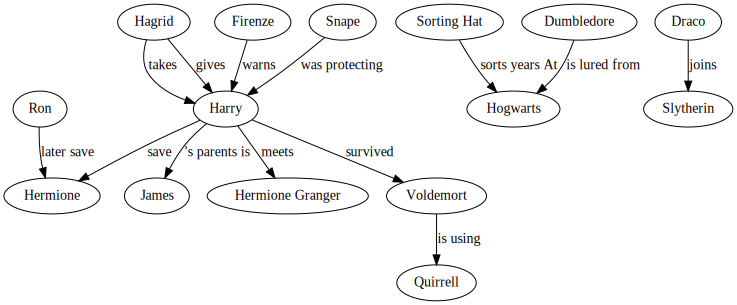

In [ ]:
graph = generate_graphviz_graph(triples)
graph

In [ ]:
graph.render(directory='graphviz-output', view=True)

'graphviz-output/entity-relations.gv.pdf'

### Question answering with BERT

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 41.4 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
     |████████████████████████████████| 596 kB 42.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline

model_name = "deepset/roberta-base-squad2"
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/473M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
def get_answer_list(question, context, model, mask = "*", topk = 10):
  # print(question)
  ans_list = []
  answer = "*"
  for i in range(topk):
    # print(answer)
    if answer != "*": 
      context = context.replace(answer, mask)
    QA_input = {
      'question': question, 
      'context': context
    }
    res = model(QA_input)
    answer = res['answer']
    score = round(res['score'], 3)
    ans_list.append((answer, score))
  return ans_list


In [ ]:
def get_location_connections(story, locations, model):
  loc_to_connections = {}
  for loc in locations:
    # print(question)
    question = "Where can I visit from {}?".format(loc)
    # print(loc)
    connections = set()
    ans_list = get_answer_list(question, story, model, topk = 5)
    print(ans_list)
    for ans, score in ans_list:
      if "*" not in ans:
        if ans == "Hogwarts":
          ans = "Hogwarts School of Witchcraft and Wizardry"   
        # elif ans == "Gringotts Bank":
        #   ans = "Gringotts Wizarding Bank"    
        for l in locations:
          if (ans in l or l in ans) and l != loc:
            connections.add(l)

    loc_to_connections[loc] = connections
    print(loc)
    print(connections)
  return loc_to_connections


In [ ]:
map = get_location_connections(hp_story, locations, nlp)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:703: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:300: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


[('London', 0.719), ('Hogwarts', 0.542), ('*,', 0.467), ('the hidden wizard commerce and retail section in *.', 0.131), ('Gringotts Wizarding Bank', 0.146)]
Diagon Alley
{'Hogwarts School of Witchcraft and Wizardry', 'Gringotts Wizarding Bank'}
[('Diagon Alley', 0.712), ('Hogwarts', 0.213), ('*,', 0.196), ('hidden wizard commerce and retail section in London', 0.101), ('* the *.', 0.058)]
Gringotts Wizarding Bank
{'Diagon Alley', 'Hogwarts School of Witchcraft and Wizardry'}
[('Hogwarts', 0.622), ('*,', 0.662), ("King's Cross railway station's secret Platform 9¾", 0.532), ('*.', 0.329), ('the school', 0.189)]
the Hogwarts Express
{'Hogwarts School of Witchcraft and Wizardry', 'Platform 9¾', "King's Cross railway station"}
[('the school', 0.417), ('his parents', 0.178), ('Professor Quirrell', 0.152), ('Diagon Alley', 0.133), ('*,', 0.182)]
the Mirror of Erised
{'Diagon Alley'}
[('Hogwarts', 0.519), ('*,', 0.464), ('Diagon Alley', 0.273), ('the school', 0.161), ('Dursleys', 0.224)]
Prive

In [ ]:
print(map)

In [ ]:
def copy_map(map):
  map_copy = {}
  for key, item in map.items():
    map_copy[key] = item.copy()
  return map_copy

In [ ]:
map_copy = copy_map(map)
map_copy

{'Diagon Alley': {'Gringotts Wizarding Bank',
  'Hogwarts School of Witchcraft and Wizardry'},
 'Gringotts Wizarding Bank': {'Diagon Alley',
  'Hogwarts School of Witchcraft and Wizardry'},
 'Hogwarts School of Witchcraft and Wizardry': {'Diagon Alley',
  'Gringotts Wizarding Bank'},
 "King's Cross": {'Diagon Alley',
  'Hogwarts School of Witchcraft and Wizardry',
  'Platform 9¾'},
 'Platform 9¾': {'Hogwarts School of Witchcraft and Wizardry', "King's Cross"},
 'Privet Drive': {'Diagon Alley',
  'Hogwarts School of Witchcraft and Wizardry',
  'the Dursleys'},
 'Sorting Hat': {'Gringotts Wizarding Bank',
  'Hogwarts School of Witchcraft and Wizardry'},
 'the Dursleys': {'Diagon Alley',
  'Gringotts Wizarding Bank',
  'Hogwarts School of Witchcraft and Wizardry',
  'Privet Drive'},
 'the Hogwarts Express': {'Hogwarts School of Witchcraft and Wizardry',
  "King's Cross",
  'Platform 9¾'},
 'the Mirror of Erised': {'Diagon Alley'}}

In [ ]:
def enhance_map(story_map):
  new_story_map = copy_map(story_map)
  for loc, connections in story_map.items():
    for conn in connections:
     new_story_map[conn].add(loc)
  return new_story_map

In [ ]:
enhanced_map = enhance_map(map)
print(enhanced_map)

{'Diagon Alley': {'Gringotts Wizarding Bank', 'the Mirror of Erised', 'Privet Drive', 'Hogwarts School of Witchcraft and Wizardry', "King's Cross", 'the Dursleys'}, 'Sorting Hat': {'Hogwarts School of Witchcraft and Wizardry', 'Gringotts Wizarding Bank'}, 'Gringotts Wizarding Bank': {'Diagon Alley', 'Sorting Hat', 'the Dursleys', 'Hogwarts School of Witchcraft and Wizardry'}, 'the Hogwarts Express': {'Hogwarts School of Witchcraft and Wizardry', 'Platform 9¾', "King's Cross"}, 'the Mirror of Erised': {'Diagon Alley'}, 'Privet Drive': {'Hogwarts School of Witchcraft and Wizardry', 'Diagon Alley', 'the Dursleys'}, 'Hogwarts School of Witchcraft and Wizardry': {'Diagon Alley', 'Sorting Hat', 'Gringotts Wizarding Bank', 'the Hogwarts Express', 'Privet Drive', 'Platform 9¾', "King's Cross", 'the Dursleys'}, 'Platform 9¾': {'Hogwarts School of Witchcraft and Wizardry', 'the Hogwarts Express', "King's Cross"}, "King's Cross": {'Hogwarts School of Witchcraft and Wizardry', 'the Hogwarts Expres

In [ ]:
print(map)

{'Diagon Alley': {'Hogwarts School of Witchcraft and Wizardry', 'Gringotts Wizarding Bank'}, 'Sorting Hat': {'Hogwarts School of Witchcraft and Wizardry', 'Gringotts Wizarding Bank'}, 'Gringotts Wizarding Bank': {'Diagon Alley', 'Hogwarts School of Witchcraft and Wizardry'}, 'the Hogwarts Express': {'Hogwarts School of Witchcraft and Wizardry', 'Platform 9¾', "King's Cross"}, 'the Mirror of Erised': {'Diagon Alley'}, 'Privet Drive': {'Hogwarts School of Witchcraft and Wizardry', 'Diagon Alley', 'the Dursleys'}, 'Hogwarts School of Witchcraft and Wizardry': {'Diagon Alley', 'Gringotts Wizarding Bank'}, 'Platform 9¾': {'Hogwarts School of Witchcraft and Wizardry', "King's Cross"}, "King's Cross": {'Hogwarts School of Witchcraft and Wizardry', 'Platform 9¾', 'Diagon Alley'}, 'the Dursleys': {'Hogwarts School of Witchcraft and Wizardry', 'Diagon Alley', 'Gringotts Wizarding Bank', 'Privet Drive'}}


In [ ]:
def BFS_SP(graph, start, goal):
    explored = []
    queue = [[start]]
    while queue:
        path = queue.pop(0)
        node = path[-1]      
        if node not in explored:
            neighbors = graph[node]
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                if neighbor == goal:
                    return len(new_path) - 1
            explored.append(node)
    return -1

def reduce_path(story_map):
  # if edge A -> B exists and there exis another path from A to B, remove edge A -> B
  clean_map = copy_map(story_map)
  for loc in dict(sorted(clean_map.items(), key=lambda item: len(item[1]), reverse=True)):
    new_connections = set()
    # print("Loc: " , loc)
    for conn in clean_map[loc].copy():
      # print("Conn: ", conn)
      temp_map = copy_map(clean_map)
      temp_map[loc].remove(conn)
      distance = BFS_SP(temp_map, loc, conn)
      # print(distance)
      if distance > 1:
        # new_connections.add(conn)
        clean_map = copy_map(temp_map)

    # clean_map[loc] = new_connections

  return clean_map

In [ ]:
def generate_map(story_map):
    dot = graphviz.Digraph('entity-relations', comment='Entity Relations')
    for loc in story_map:
      for connection in story_map[loc]:
        dot.body.append('"{}" -> "{}";'.format(loc, connection))
    return dot

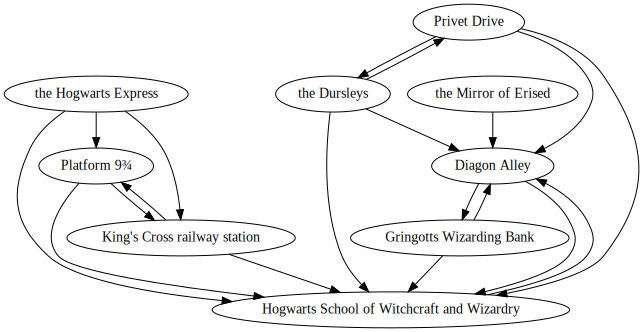

In [ ]:
graph = generate_map(map)
graph

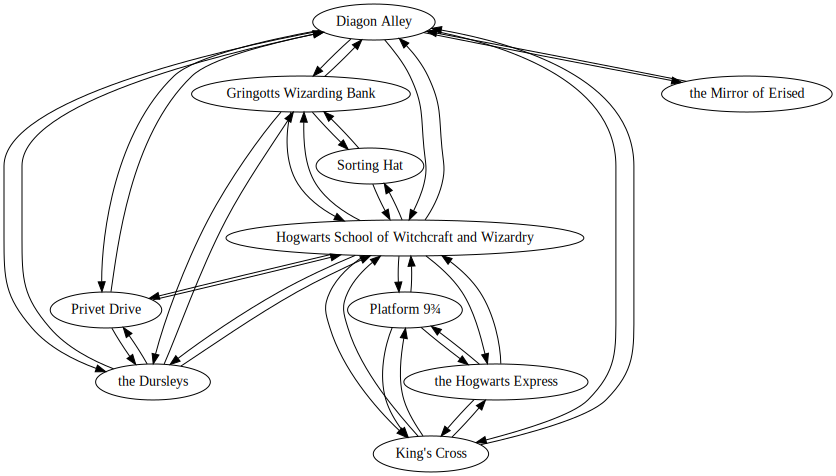

In [ ]:
graph = generate_map(enhanced_map)
graph

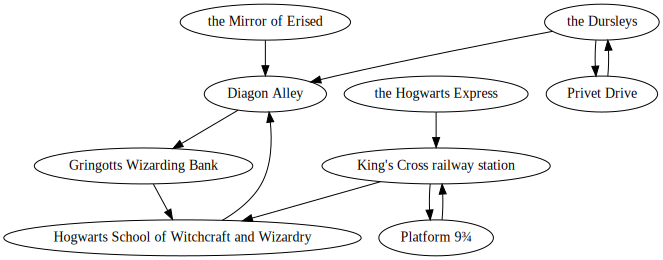

In [ ]:
clean_map = reduce_path(map)
graph_clean = generate_map(clean_map)
graph_clean

In [ ]:
enhanced_clean_map = enhance_map(clean_map)
print(enhanced_clean_map)

{'Diagon Alley': {'Hogwarts School of Witchcraft and Wizardry', 'the Mirror of Erised', 'Gringotts Wizarding Bank', 'the Dursleys'}, 'Gringotts Wizarding Bank': {'Hogwarts School of Witchcraft and Wizardry', 'Diagon Alley'}, 'the Hogwarts Express': {"King's Cross railway station"}, 'the Mirror of Erised': {'Diagon Alley'}, 'Privet Drive': {'the Dursleys'}, 'Hogwarts School of Witchcraft and Wizardry': {'Diagon Alley', "King's Cross railway station", 'Gringotts Wizarding Bank'}, 'Platform 9¾': {"King's Cross railway station"}, "King's Cross railway station": {'Hogwarts School of Witchcraft and Wizardry', 'the Hogwarts Express', 'Platform 9¾'}, 'the Dursleys': {'Diagon Alley', 'Privet Drive'}}


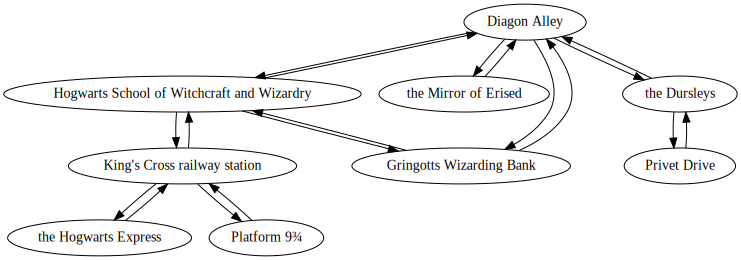

In [ ]:
graph = generate_map(enhanced_clean_map)
graph

In [ ]:
def get_location_of_person(story, people, locations, model):
  p_to_loc = {}
  for p in people:
      print(p)
      found_place = False
      question = "Where is {} ?".format()
      ans_list = get_answer_list(question, story, model, mask = "*", topk = 10)
      print(ans_list)
      for ans, score in ans_list:
        print(ans)
        if "*" not in ans:
          if ans == "Hogwarts":
            ans = "Hogwarts School of Witchcraft and Wizardry" 
          elif ans == "Gringotts Bank":
            ans = "Gringotts Wizarding Bank"         
          for l in locations:
            if ans in l or l in ans:
              p_to_loc[p] = l
              found_place = True
              break
        if found_place:
          break
      if not found_place:
        p_to_loc[p] = "nowhere"
      
      print(p_to_loc[p])
  return p_to_loc

In [ ]:
person_to_location = get_location_of_person(hp_story, people, locations, nlp)

Nicolas Flamel


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:703: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:300: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


[('Professor Quirrell', 0.081), ('Snape', 0.104), ('Hogwarts', 0.109), ('*,', 0.069), ('alive', 0.018)]
Professor Quirrell
Snape
Hogwarts
Hogwarts School of Witchcraft and Wizardry
Albus Dumbledore
[('Hogwarts', 0.275), ('headmaster', 0.289), ('Gringotts Bank and the same vault', 0.073), ('*,', 0.039), ('School of Witchcraft and Wizardry', 0.022)]
Hogwarts
Hogwarts School of Witchcraft and Wizardry
Firenze
[('forest centaur', 0.659), ('Hogwarts', 0.137), ('*,', 0.061), ('A *', 0.052), ('*', 0.193)]
forest centaur
Hogwarts
Hogwarts School of Witchcraft and Wizardry
Quirrell
[('Gryffindor', 0.625), ('Hogwarts', 0.332), ('Professor Quirrell, the Defence Against the Dark Arts teacher', 0.187), ('*,', 0.135), ('Voldemort', 0.107)]
Gryffindor
Hogwarts
Hogwarts School of Witchcraft and Wizardry
Hedwig
[('Hogwarts', 0.146), ("King's Cross railway station", 0.081), ('owl', 0.052), ('Platform 9¾', 0.106), ("Hagrid retrieved an item for the school's headmaster Albus Dumbledore", 0.042)]
Hogwarts


In [ ]:
print(person_to_location)

{'Nicolas Flamel': 'Hogwarts School of Witchcraft and Wizardry', 'Albus Dumbledore': 'Hogwarts School of Witchcraft and Wizardry', 'Firenze': 'Hogwarts School of Witchcraft and Wizardry', 'Quirrell': 'Hogwarts School of Witchcraft and Wizardry', 'Hedwig': 'Hogwarts School of Witchcraft and Wizardry', 'Voldemort': 'Hogwarts School of Witchcraft and Wizardry', 'Harry Potter': 'Hogwarts School of Witchcraft and Wizardry', 'Dudley': 'Privet Drive', 'Draco Malfoy': 'Hogwarts School of Witchcraft and Wizardry', 'Severus Snape': 'Hogwarts School of Witchcraft and Wizardry', 'Lily Potter': 'Hogwarts School of Witchcraft and Wizardry', 'Hermione Granger': 'Hogwarts School of Witchcraft and Wizardry', 'Rubeus Hagrid': 'Hogwarts School of Witchcraft and Wizardry', 'Ronald Weasley': 'Hogwarts School of Witchcraft and Wizardry'}


In [ ]:
from getpass import getpass
print('Enter OpenAI API key:')
openai_api_key = getpass()

Enter OpenAI API key:
··········


In [ ]:
import openai
openai.api_key = openai_api_key

def get_gpt3_result(prompt):
  response = openai.Completion.create(
    engine="text-curie-001",
    prompt = prompt,
    temperature=0.5,
    max_tokens=64,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stop=["###"]
  )
  return response['choices'][0]['text']

### Generate Location Information:

In [ ]:
location_info = {}
for loc in locations:
  # location_info[loc] = {}
  location_info[loc]["connections"] = list(enhanced_clean_map[loc])


In [ ]:

def get_location_description(story, location):
    prompt = "Story:\n{}\nWhat is {}?\n".format(story, location)
  # print(prompt)
    result = get_gpt3_result(prompt)
    return result.strip()

def get_location_appearance(story, location):
    prompt = "Story:\n{}\nDescribe the appearance of {}:\n".format(story, location)
  # print(prompt)
    result = get_gpt3_result(prompt)
    return result.strip()


In [ ]:
for loc in locations:
  print("------------------------")
  print(loc)
  location_info[loc]["description"] = get_location_description(hp_story, loc)
  location_info[loc]["appearance"] = get_location_appearance(hp_story, loc)
  print(location_info[loc]["description"])
  print(location_info[loc]["appearance"])

------------------------
Diagon Alley
Diagon Alley is a hidden wizard commerce and retail section in London.
Diagon Alley is a hidden section of London where wizards can purchase supplies and merchandise. It is also home to Gringotts Wizarding Bank, the only bank allowed to handle magic money. The streets are cobblestone and lined with shops, including Ollivander's Wand Shop, which sells wands
------------------------
Gringotts Wizarding Bank
Gringotts Wizarding Bank is a bank where Harry's parents left him a fortune.
Gringotts Wizarding Bank is a large, forbidding building with a roof that is a tiled green and black. There are several large, bronze doors with ornate handles.
------------------------
the Hogwarts Express
The Hogwarts Express is a magical train that takes students to Hogwarts School of Witchcraft and Wizardry.
The Hogwarts Express is a long, narrow, steam locomotive with three carriages. The first carriage is for the school's staff and the headmaster. The second carriag

In [ ]:
print(location_info)

{'Diagon Alley': {'connections': ['Hogwarts School of Witchcraft and Wizardry', 'the Mirror of Erised', 'Gringotts Wizarding Bank', 'the Dursleys'], 'description': 'Diagon Alley is a hidden wizard commerce and retail section in London.', 'appearance': "Diagon Alley is a hidden section of London where wizards can purchase supplies and merchandise. It is also home to Gringotts Wizarding Bank, the only bank allowed to handle magic money. The streets are cobblestone and lined with shops, including Ollivander's Wand Shop, which sells wands"}, 'Gringotts Wizarding Bank': {'connections': ['Hogwarts School of Witchcraft and Wizardry', 'Diagon Alley'], 'description': "Gringotts Wizarding Bank is a bank where Harry's parents left him a fortune.", 'appearance': 'Gringotts Wizarding Bank is a large, forbidding building with a roof that is a tiled green and black. There are several large, bronze doors with ornate handles.'}, 'the Hogwarts Express': {'connections': ["King's Cross railway station"], 

In [ ]:
import json
    
with open("location.json", "w") as outfile:
    json.dump(location_info, outfile)

In [ ]:
import string
def get_person_description(story, person):
  prompt = "Story:\n{}\nDescribe {} in the story:\n".format(story, person)
  # print(prompt)
  result = get_gpt3_result(prompt)
  
  return result.strip()

def get_person_appearance(story, person):
    prompt = "Story:\n{}\nDescribe the appearance of {}:\n".format(story, person)
  # print(prompt)
    result = get_gpt3_result(prompt)
    return result.strip()


In [ ]:
character_info = {}

In [ ]:
for p in people:
  print("------------------------")
  print(p)
  character_info[p] = {}
  p_description = get_person_description(hp_story, p)
  p_appearance = get_person_appearance(hp_story, p)
  # items_wearing = get_person_wearing(hp_story, p, p_persona, p_appearance)
  print(p_description)
  print(p_appearance)
  character_info[p]['description'] = p_description
  character_info[p]['appearance'] = p_appearance


------------------------
Nicolas Flamel
Nicolas Flamel is a character in the story who is mentioned several times. He is a French man who has been alive for centuries and is known for having the philosopher's stone, which is a stone that can turn any metal into pure gold.
Nicolas Flamel is an old, bald wizard with a long white beard.
------------------------
Albus Dumbledore
Albus Dumbledore is the headmaster of Hogwarts School of Witchcraft and Wizardry and a highly respected member of the wizarding community. He is well-versed in magic and is able to cast powerful spells. Dumbledore is also a noted expert on the Philosopher's Stone, an artefact that is said to
Albus Dumbledore is a tall, thin wizard with a long white beard and kind eyes. He wears a long, flowing white robe and a pointed wizard's hat.
------------------------
Firenze
Firenze is a forest centaur who teaches Harry about magic and Voldemort's plot to steal the philosopher's stone.
Firenze has a humanoid form, but his bod

In [ ]:
print(character_info)

{'Nicolas Flamel': {'description': "Nicolas Flamel is a character in the story who is mentioned several times. He is a French man who has been alive for centuries and is known for having the philosopher's stone, which is a stone that can turn any metal into pure gold.", 'appearance': 'Nicolas Flamel is an old, bald wizard with a long white beard.'}, 'Albus Dumbledore': {'description': "Albus Dumbledore is the headmaster of Hogwarts School of Witchcraft and Wizardry and a highly respected member of the wizarding community. He is well-versed in magic and is able to cast powerful spells. Dumbledore is also a noted expert on the Philosopher's Stone, an artefact that is said to", 'appearance': "Albus Dumbledore is a tall, thin wizard with a long white beard and kind eyes. He wears a long, flowing white robe and a pointed wizard's hat."}, 'Firenze': {'description': "Firenze is a forest centaur who teaches Harry about magic and Voldemort's plot to steal the philosopher's stone.", 'appearance'

In [ ]:
for char in character_info:
  character_info[char]["location"] = person_to_location[char]

In [ ]:
print(character_info)

{'Nicolas Flamel': {'description': "Nicolas Flamel is a character in the story who is mentioned several times. He is a French man who has been alive for centuries and is known for having the philosopher's stone, which is a stone that can turn any metal into pure gold.", 'appearance': 'Nicolas Flamel is an old, bald wizard with a long white beard.', 'location': 'Hogwarts School of Witchcraft and Wizardry'}, 'Albus Dumbledore': {'description': "Albus Dumbledore is the headmaster of Hogwarts School of Witchcraft and Wizardry and a highly respected member of the wizarding community. He is well-versed in magic and is able to cast powerful spells. Dumbledore is also a noted expert on the Philosopher's Stone, an artefact that is said to", 'appearance': "Albus Dumbledore is a tall, thin wizard with a long white beard and kind eyes. He wears a long, flowing white robe and a pointed wizard's hat.", 'location': 'Hogwarts School of Witchcraft and Wizardry'}, 'Firenze': {'description': "Firenze is 

In [ ]:
with open("character.json", "w") as outfile:
    json.dump(character_info, outfile)

In [ ]:
def get_person_wearing(story, person, description, appearance):
    prompt = "Story:\n{}\nCharacter: {} {}\nGive a short list of things {} is wearing in the story:\n".format(story, description, appearance, person)
  # print(prompt)
    result = get_gpt3_result(prompt)
    item_list = []
    for item in result.strip().split("\n"):
      curr = []
      for token in item[1:].lower().strip().split():
        for punc in string.punctuation:
          token = token.replace(punc, '')
        for p in person.lower().split():
          token = token.replace(p, '')
        if token not in stop and token not in string.punctuation and "wear" not in token:
          curr.append(token)
      if len(curr) > 0 and len(curr) < 7:
        item_list.append(" ".join(curr))
    return item_list

def get_person_wielding(story, person, description, appearance):
    prompt = "Story:\n{}\nCharacter: {} {}\nGive a short list of things {} is wielding in the story:\n".format(story, description, appearance, person)
  # print(prompt)
    result = get_gpt3_result(prompt)
    item_list = []
    for item in result.strip().split("\n"):
      curr = []
      for token in item[1:].lower().strip().split():
        for punc in string.punctuation:
          token = token.replace(punc, '')
        for p in person.lower().split():
          token = token.replace(p, '')
        if token not in stop and token not in string.punctuation and "wield" not in token:
          curr.append(token)
      if len(curr) > 0 and len(curr) < 7:
        item_list.append(" ".join(curr))
    return item_list

In [ ]:
for p in people:
  print("------------------------")
  print(p)
  p_description = character_info[p]['description']
  p_appearance = character_info[p]['appearance']
  items_wearing = get_person_wearing(hp_story, p, p_description, p_appearance)
  items_wielding = get_person_wielding(hp_story, p, p_description, p_appearance)
  # print(p_description)
  # print(p_appearance)
  print("Wearing:", items_wearing)
  print("Wielding:", items_wielding)
  character_info[p]['items_wearing'] = items_wearing
  character_info[p]['items_wielding'] = items_wielding
  # for item in items_wearing:

------------------------
Nicolas Flamel
Wearing: ['long white beard', 'french accent', 'robe']
Wielding: ['philosophers stone', 'invisibility cloak', 'ability turn metal pure gold']
------------------------
Albus Dumbledore
Wearing: ['long white robe', 'pointed wizards hat', 'beard']
Wielding: ['wand', 'cloak turn user invisible', 'hat reveal viewers desired thing']
------------------------
Firenze
Wearing: ['halfman halfhorse coat fur']
Wielding: ['staff', 'bow arrow', 'shield']
------------------------
Quirrell
Wearing: ['turban', 'purple robe', 'pair gloves', 'strange looking shoes']
Wielding: ['sword', 'shield', 'hat', 'ive short list things hagrid harry', 'delivers']
------------------------
Hedwig
Wearing: ['hogwarts acceptance letter', 'letter harrys parents', 'pair gloves', 'coat', 'scarf']
Wielding: ['letter hogwarts', 'harrys wand', 'talons']
------------------------
Voldemort
Wearing: ['black cloak', 'pointed wizards hat', 'black robes']
Wielding: ['wand', 'cloak renders wea

In [ ]:
print(character_info)

{'Nicolas Flamel': {'description': "Nicolas Flamel is a character in the story who is mentioned several times. He is a French man who has been alive for centuries and is known for having the philosopher's stone, which is a stone that can turn any metal into pure gold.", 'appearance': 'Nicolas Flamel is an old, bald wizard with a long white beard.', 'location': 'Hogwarts School of Witchcraft and Wizardry', 'items_wearing': ['long white beard', 'french accent', 'robe'], 'items_wielding': ['philosophers stone', 'invisibility cloak', 'ability turn metal pure gold']}, 'Albus Dumbledore': {'description': "Albus Dumbledore is the headmaster of Hogwarts School of Witchcraft and Wizardry and a highly respected member of the wizarding community. He is well-versed in magic and is able to cast powerful spells. Dumbledore is also a noted expert on the Philosopher's Stone, an artefact that is said to", 'appearance': "Albus Dumbledore is a tall, thin wizard with a long white beard and kind eyes. He w

In [ ]:
def get_personal_item_description(story, person, description, appearance, item):
    prompt = "{}\n{}\n{}\nDescribe {} in a short sentence:\n".format(story, description, appearance, item)
  # print(prompt)
    result = get_gpt3_result(prompt)
    return result.strip()

In [ ]:
items_wearing_info = {}
items_wielding_info = {}
for p in people:
  print("------------------------")
  print(p)
  items_wearing_info[p] = {}
  items_wielding_info[p] = {}
  p_description = character_info[p]['description']
  p_appearance = character_info[p]['appearance']
  items_wearing = character_info[p]['items_wearing'] 
  items_wielding = character_info[p]['items_wielding']
  print("\nWearing")
  for item in items_wearing:
    item_description = get_personal_item_description(hp_story, p, p_description, p_appearance, item)
    # print(item_description)
    items_wearing_info[p][item] = item_description
    print("- " + item + ": \n " + item_description)
  character_info[p]["items_wearing_info"] = items_wearing_info[p]
  
  print("\nWielding")
  for item in items_wielding:
    # print(item)
    item_description = get_personal_item_description(hp_story, p, p_description, p_appearance, item)
    # print(item_description)
    items_wielding_info[p][item] = item_description
    print("- " + item + ": \n " + item_description)
  character_info[p]["items_wielding_info"] = items_wielding_info[p]

  # for item in items_wearing:

------------------------
Nicolas Flamel

Wearing
- long white beard: 
 The long white beard of Nicolas Flamel is what stands out the most about him.
- french accent: 
 Some french accents are harder to understand than others, but Nicolas Flamel's accent is generally easy to understand.
- robe: 
 The robe that Nicolas Flamel is wearing is a long, white robe.

Wielding
- philosophers stone: 
 The philosopher's stone is a key item in the story that is mentioned several times. It is a stone that can turn any metal into pure gold, and it is sought by the evil Voldemort.
- invisibility cloak: 
 The invisibility cloak is a magical item that allows its owner to remain undetected.
- ability turn metal pure gold: 
 The stone allows the user to turn any metal into pure gold.
------------------------
Albus Dumbledore

Wearing
- long white robe: 
 The robe is long and flowing, covering the entire wizard's body.
- pointed wizards hat: 
 The pointed wizards hat is a tall, pointed hat that is worn by 

In [ ]:
print(character_info)

{'Nicolas Flamel': {'description': "Nicolas Flamel is a character in the story who is mentioned several times. He is a French man who has been alive for centuries and is known for having the philosopher's stone, which is a stone that can turn any metal into pure gold.", 'appearance': 'Nicolas Flamel is an old, bald wizard with a long white beard.', 'location': 'Hogwarts School of Witchcraft and Wizardry', 'items_wearing': ['long white beard', 'french accent', 'robe'], 'items_wielding': ['philosophers stone', 'invisibility cloak', 'ability turn metal pure gold'], 'items_wearing_info': {'long white beard': 'The long white beard of Nicolas Flamel is what stands out the most about him.', 'french accent': "Some french accents are harder to understand than others, but Nicolas Flamel's accent is generally easy to understand.", 'robe': 'The robe that Nicolas Flamel is wearing is a long, white robe.'}, 'items_wielding_info': {'philosophers stone': "The philosopher's stone is a key item in the s

In [ ]:
with open("character_for_dialogue.json", "w") as outfile:
    json.dump(character_info, outfile)

### Generate Item Information

In [ ]:
def get_item_list(story, location_description, location_appearance, location):
  prompt = "Story:{}\n{}{}\nGive a short list of items at {}:\n".format(story, location_description, location_appearance, location)
  result = get_gpt3_result(prompt)
  item_list = []
  for item in result.strip().split("\n"):
    curr = []
    for token in item[1:].lower().strip().split():
      for punc in string.punctuation:
        token = token.replace(punc, '')
      if token not in stop and token not in string.punctuation:
        curr.append(token)
    if len(curr) > 0 and len(curr) < 7:
      item_list.append(" ".join(curr))
  return item_list


def get_item_description(story, location_description, location_appearance, item):
  prompt = "{}\n{}{}\nDescribe {} in one sentence:\n".format(story, location_description, location_appearance, item)
  result = get_gpt3_result(prompt)
  return result.strip()

In [ ]:
item_info = {}

In [ ]:
for loc in locations:
  print("--------------------")
  print(loc)
  l_description = location_info[loc]["description"]
  l_appearance = location_info[loc]["appearance"]
  items = get_item_list(hp_story, l_description, l_appearance, loc)
  print(items)
  for item in items:
    item_info[item] = {}
    item_description = get_item_description(hp_story, l_description, l_appearance, item)
    item_info[item]["location"] = loc
    item_info[item]["description"] = item_description
    print("- " + item + ": \n " + item_description)
    

--------------------
Diagon Alley
['wand', 'school supplies', 'clothing', 'books']
- wand: 
 A wand is a device used by witches and wizards to cast spells.
- school supplies: 
 In order to attend Hogwarts School of Witchcraft and Wizardry, students must purchase supplies including a wand, school supplies, and a broomstick.
- clothing: 
 Harry wears a blue and silver Gryffindor Quidditch jersey, brown trousers, and a green and silver Gryffindor Quidditch broom.
- books: 
 Harry Potter and the Philosopher's Stone is a novel written by J.K. Rowling. It tells the story of Harry Potter's journey to attend Hogwarts School of Witchcraft and Wizardry and defeat Lord Voldemort.
--------------------
Gringotts Wizarding Bank
['wand', 'money', 'vault', 'philosophers stone']
- wand: 
 A wand is a long, slender object that is used to cast spells.
- money: 
 Money is a valuable commodity used to purchase goods and services.
- vault: 
 The vault in which Harry's parents left him a fortune is in Gringo

In [ ]:
print(item_info)

{'wand': {'location': "King's Cross railway station", 'description': 'The wand Harry purchases from Ollivander is made of ash and oak, with a dragon heartstring core.'}, 'school supplies': {'location': "King's Cross railway station", 'description': 'Harry buys school supplies, including a wand and supplies for Quidditch.'}, 'clothing': {'location': 'Diagon Alley', 'description': 'Harry wears a blue and silver Gryffindor Quidditch jersey, brown trousers, and a green and silver Gryffindor Quidditch broom.'}, 'books': {'location': 'Diagon Alley', 'description': "Harry Potter and the Philosopher's Stone is a novel written by J.K. Rowling. It tells the story of Harry Potter's journey to attend Hogwarts School of Witchcraft and Wizardry and defeat Lord Voldemort."}, 'money': {'location': 'Gringotts Wizarding Bank', 'description': 'Money is a valuable commodity used to purchase goods and services.'}, 'vault': {'location': 'Gringotts Wizarding Bank', 'description': "The vault in which Harry's 

In [ ]:
with open("game_items.json", "w") as outfile:
    json.dump(item_info, outfile)